# Задание на лабораторную работу №2. Pandas и основы python
## Общее задание
1. Сгенерировать с использованием библиотеки pandas csv файл, содержащий 3 столбца: $x_1$, $x_2$, $y$ (> 400 строк, генерация с использованием функции linspace). Вид функции определяется вариантом (диапазон выбирается студентом).
2. Открыть файл с использованием библиотеки pandas и построить графики: $y(x_1)$ ($x_2$ - константа), $y(x_2)$  ($x_1$ - константа). Графики необходимо построить с использованием matplotlib (для функции y отобразить точки на графике). 
3. Вывести для каждого столбца $(x_1, x_2, y)$: среднее, минимальное и максимальное значения.
4. Сохранить в новый csv файл те строки, для которых выполняется условие: $x_1$ меньше среднее $x_1$ или $x_2$ меньше среднее $x_2$
5. С использованием mplot3D построить 3D график функции $y(x_1, x_2)$ в отдельном окне.

## Варианты
1. $y = sin(x_1 + x_2)$
2. $y = cos(x_1 + x_2)$
3. $y = tan(x_1 + x_2) * sin(x_1)$
4. $y = 2 * x_1^2 + 3x_2^2$
5. $y = 5 * log(x_1) * log(2 * x_2)$
6. $y = 5 * log(x_1) * x_2^2$
7. $y = cos(x_1) * x_2^3$
8. $y = \frac{3}{(2 + e^{-2x})}$
9. $y = cos(x_1 + x_2) * x_2 ^ 2$
10. $y = \frac{x_2}{(1 + e^{-x_1})}$
11. $y = \frac{3 * x_1}{(1 - e^{-x_2})}$
12. $y = 0.01 * tan(x_1) * x_2^2$
13. $y = x_1^6 + x_2^2 + x_1^3 + 4x_2 + 5$
14. $y = cos(x_1) * x_2^3$
15. $y = tan(x_1) * ctg(x_2)$
16. $y = \frac{sin(x_1)}{(1 + e^{-2x_2})}$
17. $y = \frac{cos(x_1)}{(1 + e^{-2x_1})}$
18. $y = \frac{tan(x_1)}{(3 + e^{-2x_2})}$
19. $y = \frac{ctg(x_1)}{(2 + e^{-2x_2})}$
20. $y = \frac{x_1^2}{(1 + e^{-2x_2})}$


# Импорт

In [16]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Генерация

In [5]:
x1 = np.linspace(0, 2 * math.pi, 401)
x2 = np.linspace(0, 2 * math.pi, 401)
y = np.sin(x1 + x2)
df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})
df.to_csv('data.csv', index=False)

# Построение графиков

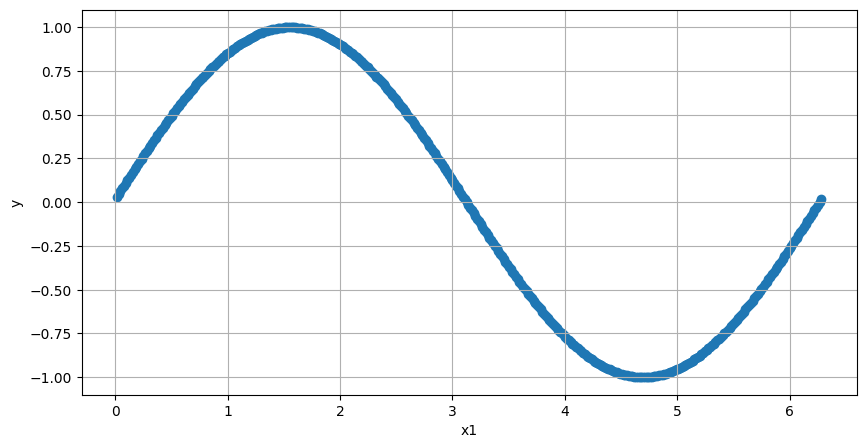

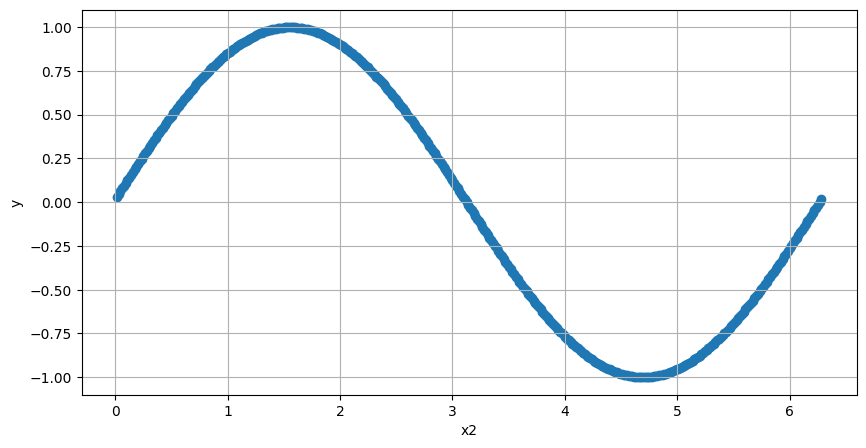

In [24]:
# Открытие файла CSV с использованием pandas
df = pd.read_csv('data.csv')

# Выбор константных значений для x1 и x2
x1_const = df['x1'][0]
x2_const = df['x2'][0]

# Вычисление y = sin(x1 + x2_const) и y = sin(x1_const + x2) для каждого значения x1 и x2
y_x1 = np.sin(df['x1'] + x2_const)
y_x2 = np.sin(x1_const + df['x2'])

# Построение графика y(x1) при x2 = константа
plt.figure(figsize=(10, 5))
plt.scatter(df['x1'], y_x1)
plt.xlabel('x1')
plt.ylabel('y')
plt.grid(True)
plt.show()

# Построение графика y(x2) при x1 = константа
plt.figure(figsize=(10, 5))
plt.scatter(df['x2'], y_x2)
plt.xlabel('x2')
plt.ylabel('y')
plt.grid(True)
plt.show()

# avg, min, max

In [14]:
df = pd.read_csv('data.csv')

print(f'mean: {df.mean()}, min: {df.min()}, max: {df.max()}')

mean: x1    3.149447e+00
x2    3.149447e+00
y     3.552714e-17
dtype: float64, min: x1    0.015708
x2    0.015708
y    -1.000000
dtype: float64, max: x1    6.283185
x2    6.283185
y     1.000000
dtype: float64


In [15]:
df = pd.read_csv('data.csv')

# Вычисление среднего значения для x1 и x2
mean_x1 = df['x1'].mean()
mean_x2 = df['x2'].mean()

# Выбор строк, где x1 меньше среднего x1 или x2 меньше среднего x2
df_new = df[(df['x1'] < mean_x1) | (df['x2'] < mean_x2)]

# Сохранение нового DataFrame в CSV-файл
df_new.to_csv('new_data.csv', index=False)

# matplotlib3

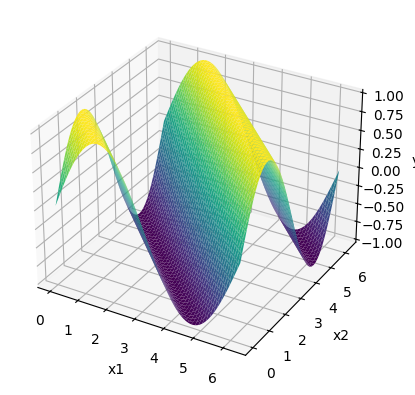

In [25]:
df = pd.read_csv('data.csv')

x1 = df['x1'].values
x2 = df['x2'].values
x1, x2 = np.meshgrid(x1, x2)

y = np.sin(x1 + x2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1, x2, y, cmap='viridis')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

plt.show()